## Analysis

    Observations/Inferences that can be made about the data calculated below:
    
    1) The box plot shows that the final tumor volumes for mice treated with Capomulin are significantly lower than those in the placebo group. This supports the claim that Capomulin has a positive effect in reducing tumor size compared to the absence of treatment (placebo).
    
    
    2) The line plot depicting timepoints against tumor volume for a single mouse (l509) treated with Capomulin shows a general downward trend. This suggests that over the course of the treatment, the tumor volume tends to decrease.
    
    
    3) There is a positive correlation between the mouse weights and tumor volumes of 0.84 when treated with Capomulin. This means the greater the mouse weight the greater the tumor volume.

In [2]:
#Import modules

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [3]:
#Load Paths
mouse_path = Path("data/Mouse_metadata.csv")
study_path = Path("data/Study_results.csv")

In [4]:
#Read the mouse_metadata.csv data
mouse_metadata = pd.read_csv(mouse_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
#Read the study_results.csv data
study_results = pd.read_csv(study_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Merge Data into single data frame
mouse_study = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])
#Display table
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
#Number of mice
mouse_count = len(pd.unique(mouse_study['Mouse ID']))
mouse_count

249

## Cleaning Data

In [8]:
#Check for any mouse ID with duplicate time points

dup_mice_ID = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [9]:
#Display the data associated with that mouse ID
dup_mice_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
#Clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_study[mouse_study['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
#Count clean DataFrame
clean_df_count = len(pd.unique(clean_df['Mouse ID']))
clean_df_count

248

## Summary Statistics

In [12]:
# Find mean tumor volume
mean_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
mean_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Find median tumor volume
median_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Find variance of tumor volume
var_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
var_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Find standard deviation of tumor volume
std_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
std_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#Find standard error of the mean (SEM) of tumor volume
sem_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
sem_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Create summary statistics table: mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_mouse_study = pd.DataFrame({'Mean Tumor Volume':mean_tumor,
                                   'Median Tumor Volume': median_tumor,
                                   'Tumor Volume Variance':var_tumor,
                                   'Tumor Volume Std. Dev.': std_tumor,
                                   'Tumor Volume Std. Err.': sem_tumor})

# Show Table
summary_mouse_study

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [18]:
#Count number of mouse per drug regimen

count_mice = (clean_df['Drug Regimen'].value_counts())
count_mice

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [19]:
# Create bar plots using:
# (1) DataFrame.plot
# (2) Pyplot

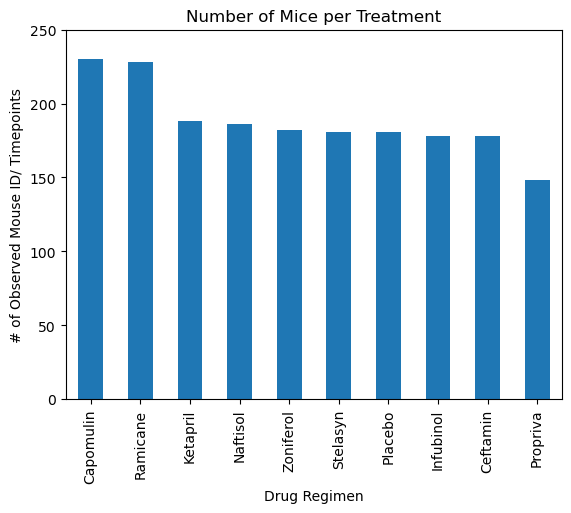

In [22]:
#Create Bar Plot Showing total number of timepoints for all mice tested for each drug regimen (using DataFrame.plot)
count_mice.plot(kind="bar")

#Format chart
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse ID/ Timepoints")
plt.ylim(0, 250)

plt.show()

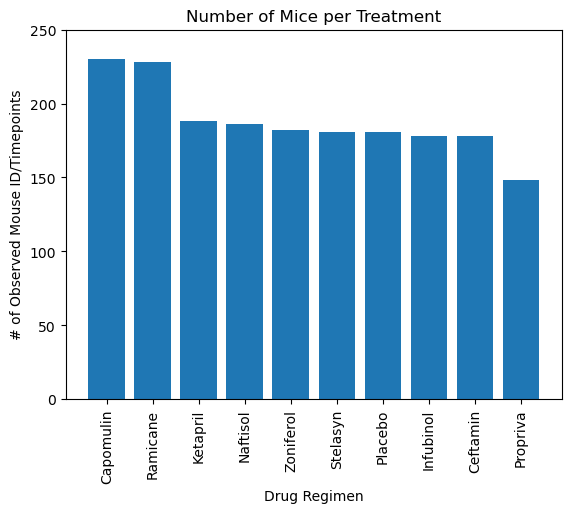

In [21]:
#Create bar plot Showing total number of timepoints for all mice tested for each drug regimen (using pyplot)
#Designate axis
x_axis = count_mice.index.values
y_axis = count_mice.values

#Plot bar plot
plt.bar(x_axis, y_axis, align='center')

#Format chart
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse ID/Timepoints")
plt.xticks(rotation="vertical")
plt.ylim(0, 250)
plt.show()

In [25]:
# Generate Pie Chart using:
# (1) DataFrame.plot
# (2) Pyplot

In [26]:
#Count gender of mice
count_gender = (clean_df['Sex'].value_counts())
count_gender

Sex
Male      958
Female    922
Name: count, dtype: int64

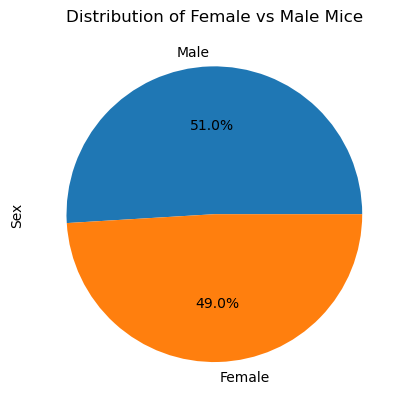

In [27]:
#Create Pie chart showing distribution of female versus male mice in the study. (DataFrame.plot)
count_gender.plot(kind="pie", autopct='%1.1f%%')

#Format chart
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

plt.show()

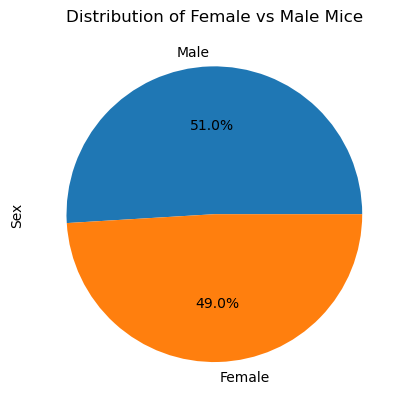

In [28]:
#Create Pie chart showing distribution of female versus male mice in the study. (pyplot)
sex = ["Male", "Female"]
count = ["958", '922']

plt.title("Distribution of Female vs Male Mice")
plt.pie(count, labels = sex, autopct='%1.1f%%' )
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Box Plots

In [29]:
# Create a grouped DataFrame with the last time point for each mouse
#reset index dataframe
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [30]:
merged_last_timepoint = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"])

merged_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [31]:
# Create a list of treatment names and an empty list for tumor volume data
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []

# Loop through each drug, append final tumor volumes to the list
for drug in treatments:
    tumor_volume_data.append(merged_last_timepoint.loc[merged_last_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"])

# Determine outliers
for i in range(len(treatments)):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    print(f"Outliers for {treatments[i]}: {outliers}")


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


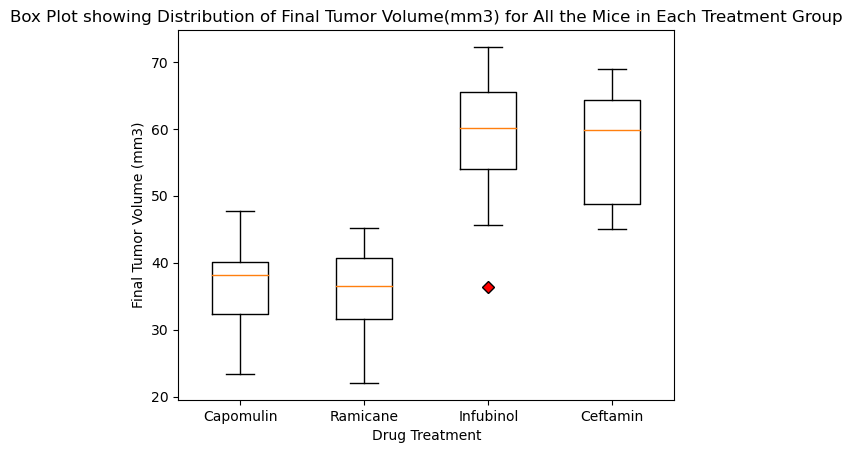

In [32]:
# Box plot and formatting
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Treatment")
plt.title("Box Plot showing Distribution of Final Tumor Volume(mm3) for All the Mice in Each Treatment Group")
plt.show()

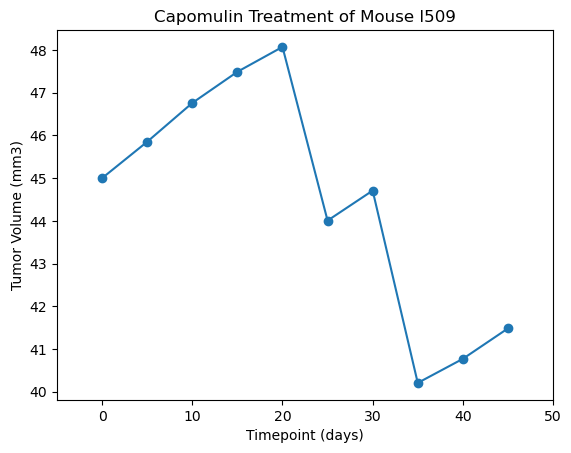

In [33]:
# Line plot for a single mouse treated with Capomulin
#Df for Capomulin Drug
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
#Select single mouse 
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "l509"]

#Plot Line plot
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.xlim([-5, 50])
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()


## Line and Scatter Plots

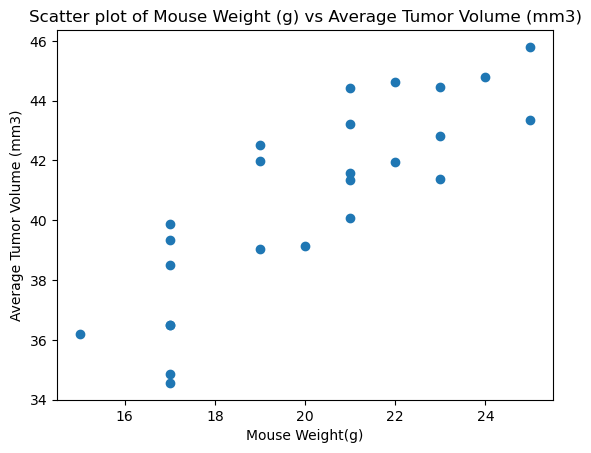

In [34]:
# Scatter plot for mouse weight versus average observed tumor volume for Capomulin regimen
#Average Tumor volume and average mouse weight
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

#Plot scatter plot of mouse weight vs tumor volume
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Scatter plot of Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression 

In [37]:
#Calculate correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin treatment regimen
corr_coeff = st.pearsonr(mouse_weight, avg_tumor_volume)
corr_coeff

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)

In [38]:
# Linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)

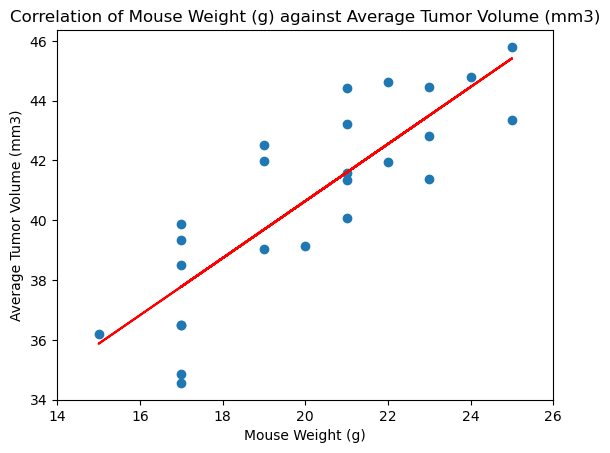

In [39]:
#Plot scatter plot with regression line
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Correlation of Mouse Weight (g) against Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.show()